In [218]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [219]:
# Opening file, reading, eliminating whitespaces, and splitting by '\n', which in turn creates list
labels = open(r'C:\\CV\\lab4\\coco.names').read().strip().split('\n')  # list of names

# # Check point
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [220]:
# Defining paths to the weights and configuration file with model of Neural Network
weights_path = r'C:\\CV\\lab4\\yolov2.weights'
configuration_path = r'C:\\CV\\lab4\\yolov2.cfg'

In [221]:
# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.6

# Setting threshold for non maximum suppression
threshold = 0.3

In [222]:
network = cv.dnn.readNetFromDarknet(configuration_path, weights_path)

In [223]:
# Getting names of all layers
layers_names_all = network.getLayerNames() 
print(layers_names_all) # list of layers' names

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [224]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Loading input image from file

In [225]:
classes=[]

with open(r'C:\\CV\\lab4\\coco.names','r') as f:
    classes=f.read().splitlines()

In [226]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [239]:
# Our image initially is in RGB format
# But now we open it in BGR format as function 'cv2.imread' opens it so
image_input = cv.imread(r'C:\\CV\\lab4\\dog.jpg')


# Getting image shape
image_input_shape = image_input.shape

# Check point
print(image_input_shape)  # tuple of (917, 1222, 3)

(194, 259, 3)


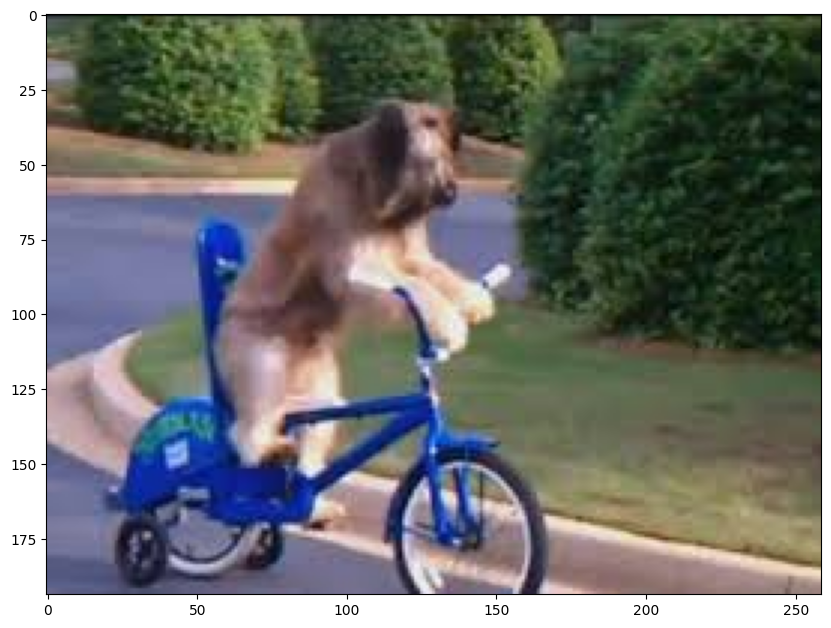

In [240]:
# Showing RGB image but firstly converting it from BGR format
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv.cvtColor(image_input, cv.COLOR_BGR2RGB))
plt.show()

In [241]:
# The 'cv2.dnn.blobFromImage' function returns 4-dimensional blob
# from input image after mean subtraction, normalizing, and RB channels swapping
# Resulted shape has number of images, number of channels, width and height
# E.G.: blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
# Link: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
blob = cv.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
height, width = image_input_shape[:2]
height, width

(194, 259)

In [242]:
print(image_input.shape)  # (183, 275, 3)
print(blob.shape)  # (1, 3, 416, 416)

(194, 259, 3)
(1, 3, 416, 416)


In [243]:
network.setInput(blob)

In [244]:
output_layers_name=network.getUnconnectedOutLayersNames()
#output_layers_name
layeroutput=network.forward(output_layers_name)

In [245]:
boxes=[]
confidences=[]
class_ids=[]

for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.5:
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
        
            x=int(center_x-w/2)
            y=int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [246]:
len(boxes)

13

In [247]:
indexes=cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [248]:
font=cv.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [249]:
for i in indexes.flatten():
    x,y,w,h=boxes[i]
    
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[i]
    
    cv.rectangle(image_input,(x,y),(x+w,y+h),color,5)
    cv.putText(image_input,label+" "+confi,(x,y+20),font,2,(255,255,255),1)

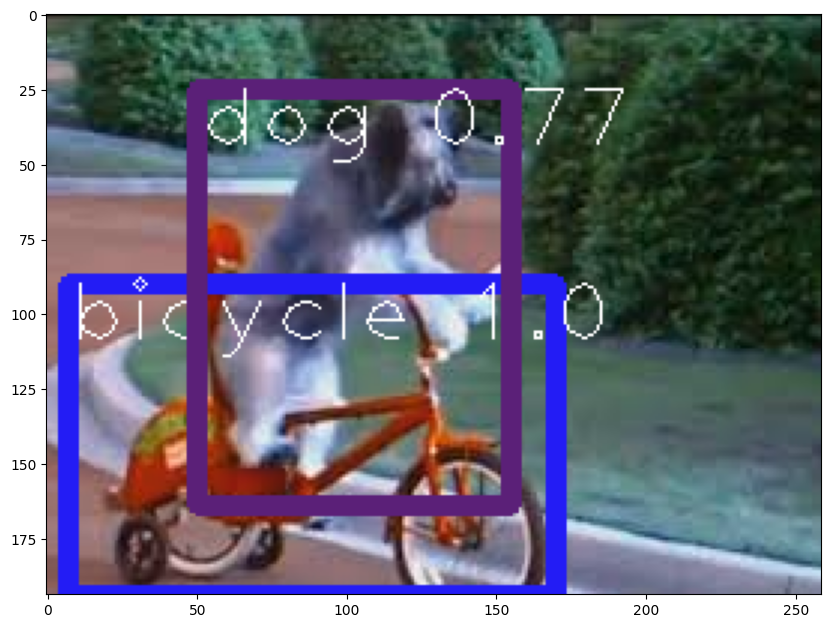

In [250]:
plt.imshow(image_input)

# YOLOv3

In [214]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [213]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [209]:
tr = cv.imread(r'C:\\CV\\lab4\\tr.jpg')
dog = cv.imread(r'C:\\CV\\lab4\\dog.jpg')

In [211]:
x1, image1 = data.transforms.presets.ssd.load_test(tr, short=512)
x2, image2 = data.transforms.presets.ssd.load_test(dog, short=512)

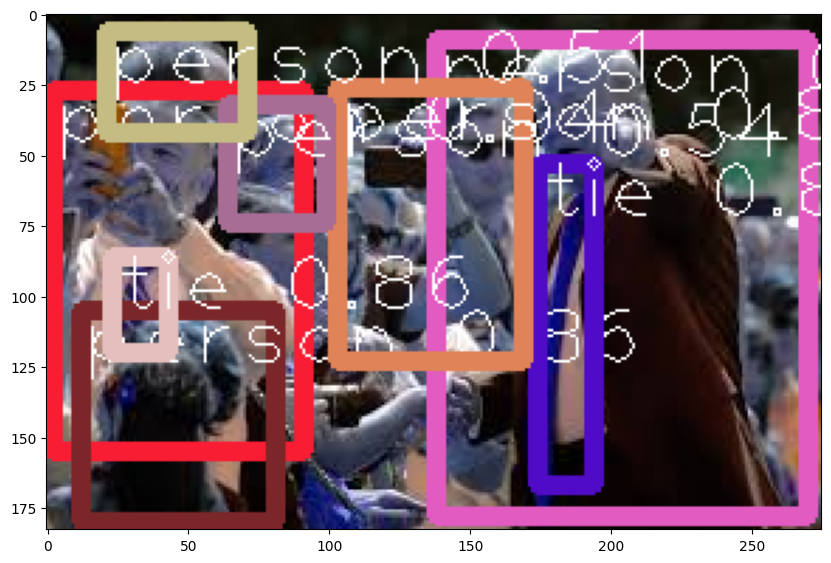

In [238]:
class_IDs, scores, bounding_boxes = net(x1)
plt.imshow(image1)
ax = utils.viz.plot_bbox(image1, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

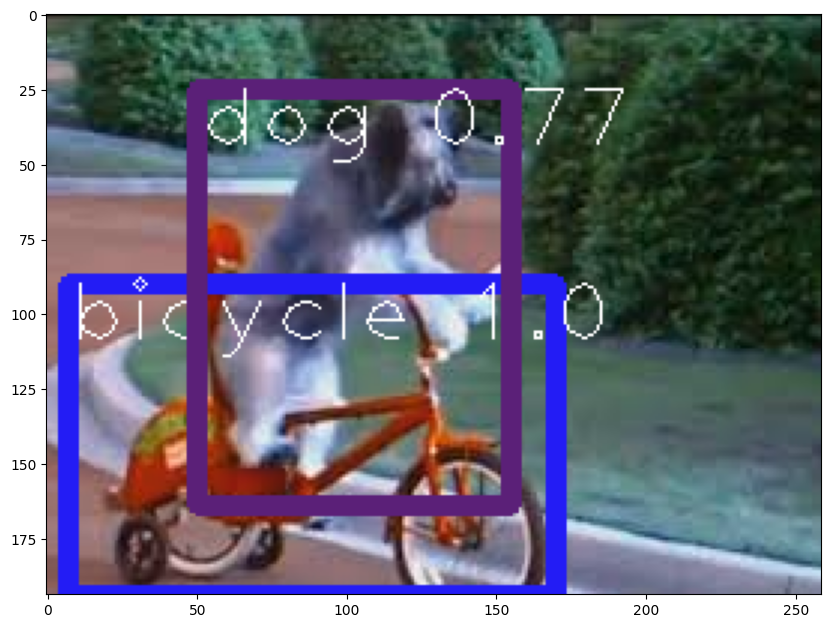

In [251]:
class_IDs, scores, bounding_boxes = net(x2)
plt.imshow(image1)
ax = utils.viz.plot_bbox(image2, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()